# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Clean_Manual_DBSCAN_woFalseLabel_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(40897, 6)

<Axes: ylabel='Type 1'>

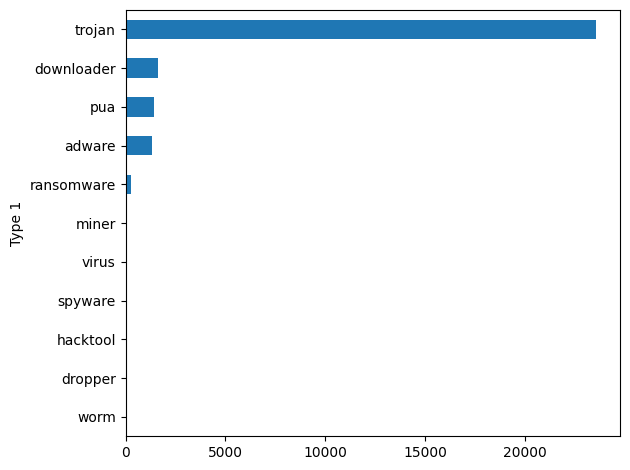

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#DROP ROWS THAT ARE FALSELLY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

how_many_clusters()

Number of Clusters: 11841
Number of single-item Clusters: 9821


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        23557
downloader     1617
pua            1408
adware         1325
ransomware      250
miner            97
virus            55
spyware          36
hacktool          5
dropper           4
worm              2
Name: count, dtype: int64

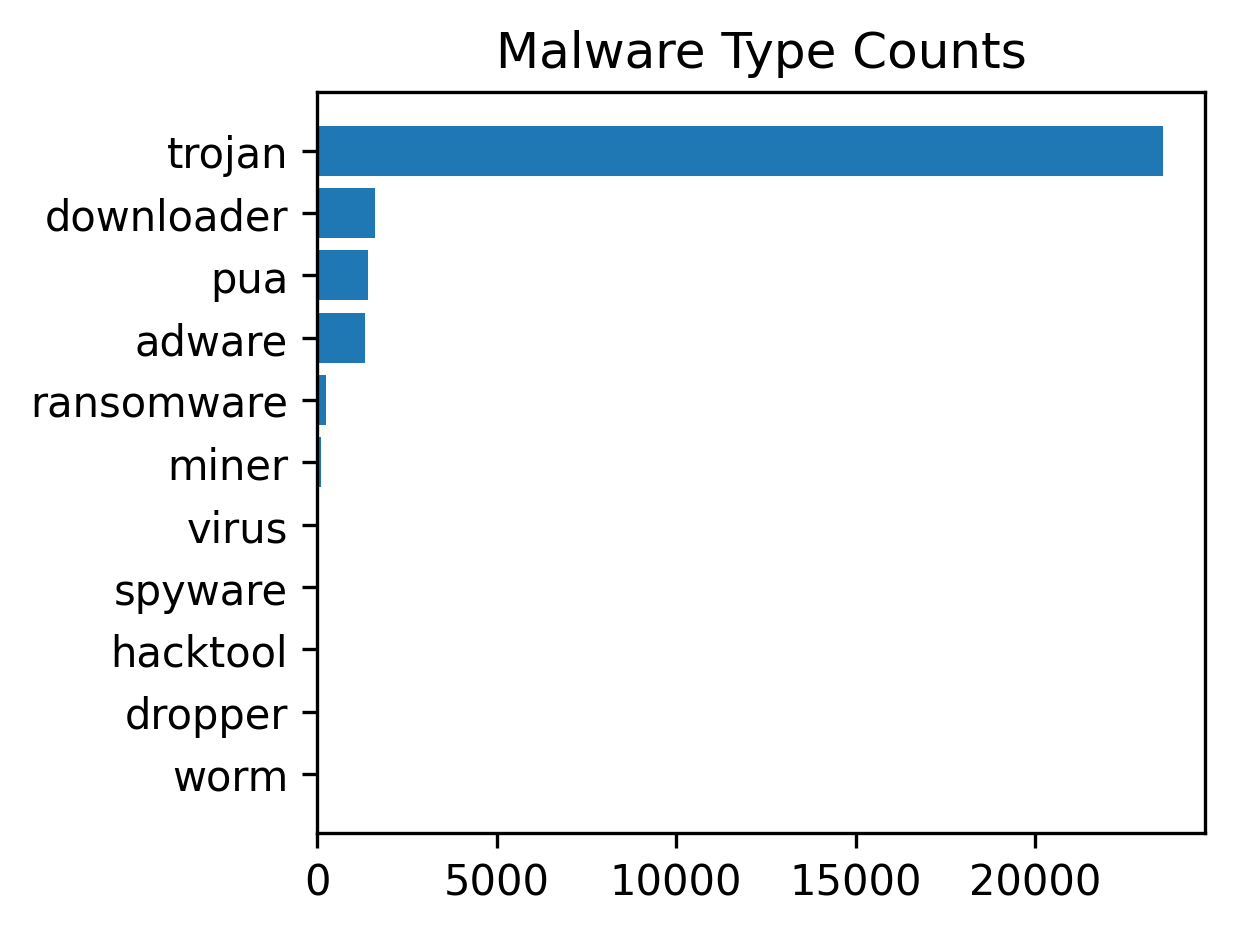

In [4]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## How many clusters are there?

In [5]:
how_many_clusters( )

Number of Clusters: 11841
Number of single-item Clusters: 9821


In [6]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
malicious_df.head()

,cluster,hash,Type 1,Type 2,Type 3,pattern,type_pattern
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",trojan _ _
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory...",trojan _ _
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",adware _ _
12,12,1282837376a698e38af5cca54bdfbdd0,trojan,_,_,"GetSystemTimeAsFileTime,LdrGetDllHandle,LdrGet...",trojan _ _


In [7]:
how_many_clusters()

Number of Clusters: 10343
Number of single-item Clusters: 9821


## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 3: trojan (1); 
CLUSTER 4: trojan (1); 
CLUSTER 5: trojan (1); 
CLUSTER 7: adware (1); 
CLUSTER 12: trojan (1); 
CLUSTER 16: trojan (1); 
CLUSTER 20: trojan (1); 
CLUSTER 25: trojan (1); 
CLUSTER 28: pua (1); 
CLUSTER 30: trojan (1); 
CLUSTER 33: pua (1); 
CLUSTER 34: downloader (1); 
CLUSTER 35: trojan (1); 
CLUSTER 38: downloader (1); 
CLUSTER 40: trojan (2); 
CLUSTER 46: trojan (1); 
CLUSTER 48: trojan (1); 
CLUSTER 50: trojan (1); 
CLUSTER 51: trojan (1); 
CLUSTER 59: trojan (1); 
CLUSTER 61: trojan (1); 
CLUSTER 63: trojan (3); 
CLUSTER 64: 
CLUSTER 66: trojan (1); 
CLUSTER 70: trojan (1); 
CLUSTER 71: downloader (1); 
CLUSTER 75: trojan (1); 
CLUSTER 79: trojan (1); 
CLUSTER 87: downloader (1); 
CLUSTER 96: pua (1); 
CLUSTER 106: downloader (1); 
CLUSTER 108: trojan (1); 
CLUSTER 109: trojan (1); 
CLUSTER 110: trojan (1); 
CLUSTER 111: trojan (1); 
CLUSTER 112: trojan (1); 
CLUSTER 114: trojan (1); 
CLUSTER 116: adware (1); 
CLUSTER 118: 
CLUSTER 119: trojan (1); 
CLUSTER

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount_woNoise.csv", index=False)

# of Unique Malware Type: 11

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 6017
Matching Clusters: [3, 4, 5, 12, 16, 20, 25, 30, 35, 40, 46, 48, 50, 51, 59, 61, 63, 66, 70, 75, 79, 108, 109, 110, 111, 112, 114, 119, 120, 123, 126, 128, 129, 130, 131, 136, 141, 145, 149, 150, 152, 153, 154, 158, 163, 164, 165, 167, 169, 170, 171, 172, 176, 178, 179, 184, 185, 187, 191, 193, 197, 204, 205, 206, 210, 212, 215, 217, 218, 220, 226, 231, 236, 238, 239, 244, 245, 246, 249, 250, 252, 257, 259, 269, 270, 271, 272, 273, 275, 278, 279, 280, 283, 285, 289, 291, 293, 294, 297, 298, 299, 300, 302, 304, 305, 306, 308, 311, 313, 321, 323, 328, 329, 330, 331, 332, 333, 335, 340, 341, 343, 349, 356, 357, 359, 360, 361, 362, 367, 368, 370, 371, 373, 374, 375, 377, 381, 383, 384, 385, 386, 388, 397, 398, 400, 402, 403, 404, 406, 407, 411, 418, 420, 423, 424, 429, 430, 433, 434, 435, 436, 437, 439, 442, 444, 446, 447, 448, 450, 453, 454, 456, 458, 459, 462, 467, 468, 472, 475, 476, 

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
10,trojan,6017,"[3, 4, 5, 12, 16, 20, 25, 30, 35, 40, 46, 48, ..."
9,downloader,400,"[34, 38, 71, 87, 106, 135, 229, 235, 256, 342,..."
8,pua,336,"[28, 33, 96, 155, 225, 227, 267, 276, 309, 320..."
7,adware,333,"[7, 116, 166, 168, 214, 268, 290, 301, 391, 41..."
6,ransomware,45,"[327, 1053, 1698, 1740, 1800, 1808, 1961, 2008..."
5,miner,18,"[265, 904, 1315, 1988, 2196, 2564, 3155, 3535,..."
4,virus,7,"[438, 2930, 3345, 4493, 7021, 8331, 9668]"
3,spyware,6,"[1142, 5890, 6336, 8548, 8575, 10446]"
2,dropper,3,"[2779, 2783, 5125]"
1,hacktool,2,"[503, 2106]"


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}_woNoise.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               111971
LdrLoadDll                            62188
LdrGetDllHandle                       41292
RegOpenKeyExW                         36287
NtClose                               33222
NtAllocateVirtualMemory               32022
RegCloseKey                           28141
RegQueryValueExW                      27291
GetSystemTimeAsFileTime               19703
NtDelayExecution                      13074
NtOpenKey                             12296
NtQueryValueKey                       12175
GetSystemMetrics                      11731
LoadResource                           9906
EnumWindows                            9210
FindResourceExW                        8450
NtFreeVirtualMemory                    8365
NtProtectVirtualMemory                 8254
RegOpenKeyExA                          6719
SetUnhandledExceptionFilter            6609
CoInitializeEx                         6150
NtCreateFile                           5684
GetSystemInfo            

downloader
LdrGetProcedureAddress               7082
LdrLoadDll                           4105
LdrGetDllHandle                      2440
RegOpenKeyExW                        2100
NtClose                              2079
NtAllocateVirtualMemory              2052
RegCloseKey                          1621
RegQueryValueExW                     1551
GetSystemTimeAsFileTime              1168
GetSystemMetrics                      779
NtOpenKey                             750
NtQueryValueKey                       728
NtDelayExecution                      723
NtProtectVirtualMemory                518
EnumWindows                           505
NtFreeVirtualMemory                   491
LoadResource                          491
SetUnhandledExceptionFilter           433
FindResourceExW                       422
RegOpenKeyExA                         406
CoInitializeEx                        376
GetSystemInfo                         374
DrawTextExW                           368
NtReadFile             

pua
LdrGetProcedureAddress               5356
LdrLoadDll                           3091
NtClose                              2009
LdrGetDllHandle                      1903
RegOpenKeyExW                        1875
RegCloseKey                          1510
NtAllocateVirtualMemory              1507
RegQueryValueExW                     1415
GetSystemTimeAsFileTime              1165
NtDelayExecution                      787
NtOpenKey                             692
NtQueryValueKey                       629
EnumWindows                           622
GetSystemMetrics                      554
LoadResource                          479
NtFreeVirtualMemory                   431
NtProtectVirtualMemory                391
FindResourceExW                       367
SetUnhandledExceptionFilter           350
CoInitializeEx                        334
NtCreateFile                          326
RegOpenKeyExA                         302
NtReadFile                            290
RegEnumKeyW                   

adware
LdrGetProcedureAddress               5772
LdrLoadDll                           3556
RegOpenKeyExW                        1882
LdrGetDllHandle                      1737
NtClose                              1704
NtAllocateVirtualMemory              1621
RegCloseKey                          1451
RegQueryValueExW                     1400
GetSystemTimeAsFileTime              1133
NtDelayExecution                      667
NtOpenKey                             598
GetSystemMetrics                      591
NtQueryValueKey                       573
EnumWindows                           532
NtProtectVirtualMemory                434
NtFreeVirtualMemory                   422
SetUnhandledExceptionFilter           375
GetSystemInfo                         347
RegOpenKeyExA                         344
CoInitializeEx                        340
LoadResource                          329
DrawTextExW                           317
NtCreateFile                          288
NtReadFile                 

ransomware
LdrGetProcedureAddress               817
LdrLoadDll                           512
LdrGetDllHandle                      244
RegOpenKeyExW                        234
NtClose                              226
NtAllocateVirtualMemory              208
RegCloseKey                          186
RegQueryValueExW                     180
GetSystemTimeAsFileTime              141
NtQueryValueKey                      117
NtOpenKey                            113
GetSystemMetrics                      89
NtDelayExecution                      63
GetSystemInfo                         59
EnumWindows                           56
NtProtectVirtualMemory                54
SetUnhandledExceptionFilter           52
GetFileAttributesExW                  48
CreateJobObjectW                      47
DrawTextExW                           46
NtDuplicateObject                     46
RegOpenKeyExA                         44
CoInitializeEx                        41
LoadResource                          40
NtFre

miner
LdrGetProcedureAddress               301
LdrLoadDll                           186
RegOpenKeyExW                        116
RegCloseKey                           96
NtAllocateVirtualMemory               92
RegQueryValueExW                      89
NtClose                               86
LdrGetDllHandle                       74
GetSystemMetrics                      59
GetSystemTimeAsFileTime               44
NtProtectVirtualMemory                42
NtQueryValueKey                       36
DrawTextExW                           36
NtOpenKey                             31
RegOpenKeyExA                         26
GetSystemInfo                         23
NtFreeVirtualMemory                   21
GetSystemWindowsDirectoryW            21
SetUnhandledExceptionFilter           21
NtDelayExecution                      20
LoadResource                          19
CoInitializeEx                        19
GetFileAttributesW                    17
GetSystemDirectoryW                   16
EnumWindow

virus
LdrGetProcedureAddress         157
LdrLoadDll                      76
LdrGetDllHandle                 68
NtClose                         64
NtOpenProcess                   36
NtAllocateVirtualMemory         25
RegOpenKeyExW                   23
RegCloseKey                     22
GetSystemTimeAsFileTime         18
RegQueryValueExW                17
NtProtectVirtualMemory          13
GetSystemMetrics                12
NtDelayExecution                11
NtOpenKey                       10
NtQueryValueKey                  9
NtDuplicateObject                8
EnumWindows                      8
SetUnhandledExceptionFilter      6
NtFreeVirtualMemory              6
ReadProcessMemory                5
OleInitialize                    5
GetSystemInfo                    5
RegOpenKeyExA                    5
CoInitializeEx                   4
DrawTextExW                      4
GetFileType                      4
LdrUnloadDll                     3
CreateThread                     3
NtOpenKeyEx   

spyware
LdrGetProcedureAddress         106
LdrLoadDll                      60
LdrGetDllHandle                 48
NtAllocateVirtualMemory         44
NtClose                         36
RegOpenKeyExW                   22
GetSystemTimeAsFileTime         20
RegCloseKey                     20
RegQueryValueExW                14
GetSystemMetrics                11
RegOpenKeyExA                   10
FindFirstFileExW                10
NtOpenKey                       10
NtFreeVirtualMemory              9
NtProtectVirtualMemory           9
LoadResource                     9
NtQueryValueKey                  8
SizeofResource                   7
FindResourceW                    7
NtDelayExecution                 7
SetErrorMode                     6
RegQueryValueExA                 6
LdrUnloadDll                     6
GetTimeZoneInformation           6
SetUnhandledExceptionFilter      6
NtCreateFile                     6
EnumWindows                      6
GetSystemInfo                    5
NtDuplicateO

dropper
LdrGetProcedureAddress         46
LdrLoadDll                     30
NtClose                        15
RegOpenKeyExW                  15
GetSystemTimeAsFileTime        13
NtReadFile                     13
RegCloseKey                    13
SetFilePointer                 13
NtAllocateVirtualMemory        12
RegQueryValueExW               11
LdrGetDllHandle                10
GetSystemMetrics                9
EnumWindows                     6
NtDelayExecution                6
LoadResource                    6
FindResourceExW                 5
DrawTextExW                     4
CoInitializeEx                  4
SetUnhandledExceptionFilter     4
NtQueryValueKey                 4
NtCreateFile                    4
NtOpenKey                       4
GetSystemInfo                   3
CreateThread                    3
WSAStartup                      3
RegQueryInfoKeyW                2
GetSystemDirectoryW             2
RegQueryValueExA                2
RegOpenKeyExA                   2
NtFree

hacktool
LdrGetProcedureAddress         24
RegOpenKeyExW                  17
RegQueryValueExW               15
LdrLoadDll                     12
__exception__                  11
LdrGetDllHandle                10
RegCloseKey                    10
NtClose                        10
NtAllocateVirtualMemory        10
NtFreeVirtualMemory             7
NtQuerySystemInformation        7
timeGetTime                     5
NtCreateFile                    4
NtOpenKey                       4
NtQueryValueKey                 4
GetSystemTimeAsFileTime         3
RegOpenKeyExA                   3
RegEnumKeyW                     2
CoInitializeEx                  2
CoCreateInstance                2
RegQueryInfoKeyW                2
NtReadFile                      2
SetFilePointer                  2
RegEnumKeyExW                   2
GetSystemDirectoryA             2
RegQueryValueExA                2
NtDelayExecution                2
FindWindowA                     1
EnumWindows                     1
GetNa

Series([], Name: count, dtype: int64)

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['SetStdHandle', 'RegQueryInfoKeyA', 'SHGetSpecialFolderLocation', 'UnhookWindowsHookEx', 'EnumServicesStatusA', 'DeleteUrlCacheEntryA', 'DrawTextExA', 'GetKeyboardState', 'CryptGenKey', 'CryptExportKey', 'NtTerminateThread', 'WSASocketW', 'CryptDecodeObjectEx', 'NtSuspendThread', 'NtQueueApcThread', 'MessageBoxTimeoutW', 'SetFileInformationByHandle', 'GetFileInformationByHandleEx', 'GetAddrInfoW', 'GetVolumePathNameW', 'StartServiceW', 'RegDeleteValueA', 'InternetSetStatusCallback', 'Module32FirstW', 'Module32NextW', 'InternetReadFile', 'HttpQueryInfoA', 'ObtainUserAgentString', 'InternetOpenUrlA', 'ControlService', 'GetUserNameExA', 'SendNotifyMessageW', 'NtDeleteKey', 'CertOpenStore']


1 downloader
['InternetGetConnectedState', 'CreateServiceW', 'StartServiceA', 'DeleteUrlCacheEntryW', 'InternetCrackUrlW', 'shutdown', 'MessageBoxTimeoutA', 'GetKeyState', 'CreateServiceA']


2 pua
['bind', 'getsockname', 'NtReadVirtualMemory', 'RtlRemoveVectoredExceptionHandler', 'WSARecv',

## How many samples remaining?

In [12]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

11009
25.7238%


## What are the remaining clusters?

In [13]:
how_many_clusters()

Number of Clusters: 10343
Number of single-item Clusters: 9821
